# __Tutorial on Gaia Spectra__

*prepared by Carine Babusiaux*

If not already done, install [astroquery](https://astroquery.readthedocs.io) and [GaiaXPy](https://gaia-dpci.github.io/GaiaXPy-website/)

In [ ]:
!pip install astroquery
!pip install GaiaXPy

In [1]:
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np

# Table of contents
- [RVS Spectra](#rvs)
- [XP Spectra with GaiaXPy](#xp)
    - [Example on two white dwarfs](#WD)
    - [How to change the default sampling](#sampling)
    - [Generate synthetic photometry](#synthphot)

## RVS Spectra <a name="rvs"></a>

Let's select three different type of stars and look for their RVS spectra

In [2]:
RVSsourceIds = ["25276196070213760", "2267193732388859776", "5611353606626845184"]
RVSsourceLabels = ["solar-type","hot star","very cool star"]

In [3]:
rvsdatalink = Gaia.load_data(ids=RVSsourceIds, retrieval_type='RVS', data_structure = 'COMBINED', output_file = None)
rvsdatalink.keys()

dict_keys(['RVS_COMBINED.xml'])

In [4]:
dl_key      = list(rvsdatalink.keys())[0]
tables      = [product.to_table() for product in rvsdatalink[dl_key]]

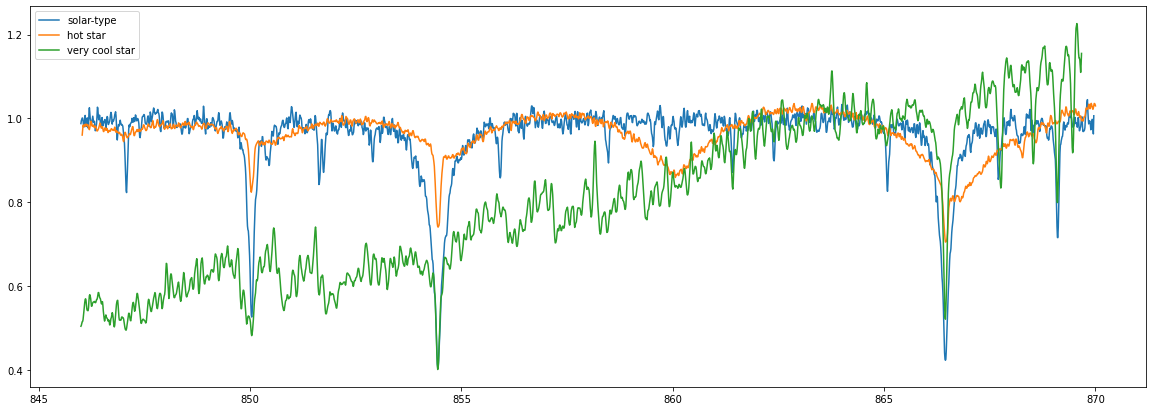

In [5]:
plt.figure(figsize=[20,7])
for rvsspectra in tables:
    plt.plot(rvsspectra['wavelength'], rvsspectra['flux'], '-')
    plt.gca().legend(RVSsourceLabels)
plt.show()

## XP spectra with GaiaXPy <a name="xp"></a>

See also https://gaia-dpci.github.io/GaiaXPy-website/tutorials/

In [6]:
from gaiaxpy import calibrate
from gaiaxpy import plot_spectra

### Example on two white dwarfs <a name="WD"></a>

Let's select two different white dwarfs, a hydrogen-dominated atmosphere one (DA) and a helium-dominated one (DB)

In [7]:
WDsourceIds = ["3489719481290397696", "691116660913783936"] # from 2023arXiv230807090G

GaiaXPy calibrate function can both download the datalink XP_CONTINUOUS spectra and calibrate it to get the equilavent of a XP_SAMPLED spectra directly: 

In [8]:
calibrated_spectra, sampling = calibrate(WDsourceIds)

                                                         0/2 [00:00<?, ?spec/s]

In [9]:
calibrated_spectra

source_id                                               flux  \
0  3489719481290397696  [4.64815322492067e-16, 4.636064362754639e-16, ...   
1   691116660913783936  [1.4387266612687109e-16, 1.499900253064297e-16...   

                                          flux_error  
0  [1.6415168618539022e-17, 1.351674594286787e-17...  
1  [8.378779573381894e-18, 7.149553343376502e-18,...

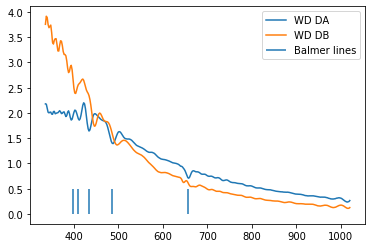

In [10]:
plt.plot(sampling,calibrated_spectra.loc[0,"flux"]/np.mean(calibrated_spectra.loc[0,"flux"]))
plt.plot(sampling,calibrated_spectra.loc[1,"flux"]/np.mean(calibrated_spectra.loc[1,"flux"]))
plt.vlines([656.3,486.1,434.0,410.2,397.0],0,0.5) # Balmer lines
plt.gca().legend(["WD DA", "WD DB","Balmer lines"])
plt.show()

### How to change the default sampling <a name="sampling"></a>

If you do not want GaiaXPy to load the XP_CONTINUOUS spectra twice for this exercice, download the XP_CONTINUOUS yourself and give it as input to the GaiaXPy calibrate method: 

In [11]:
xpdatalink = Gaia.load_data(ids="2342674179138734080", retrieval_type='XP_CONTINUOUS', 
                            format='csv', data_structure = 'RAW')

In [12]:
continuoustable = xpdatalink[list(xpdatalink.keys())[0]][0].to_pandas()
continuoustable

source_id          solution_id  bp_basis_function_id  \
0  2342674179138734080  4545469030156206080                    56   

   bp_degrees_of_freedom  bp_n_parameters  bp_n_measurements  \
0                   1332               55               1387   

   bp_n_rejected_measurements  bp_standard_deviation  bp_chi_squared  \
0                           7               1.087727       1575.9542   

                                     bp_coefficients  ... rp_n_parameters  \
0  (12069.743418372067, -992.2948578438177, -349....  ...              55   

  rp_n_measurements  rp_n_rejected_measurements  rp_standard_deviation  \
0              2776                          22               1.060711   

   rp_chi_squared                                    rp_coefficients  \
0       3061.4177  (14034.548086953931, -1529.2438732338364, -12....   

                               rp_coefficient_errors  \
0  (3.3225465, 3.186925, 3.0336554, 3.3824296, 3....   

                         rp_coefficient_correlations  rp_n_relevant_bases  \
0  (-0.078817695, 0.103364155, 0.16414402, 0.0176...                    9   

   rp_relative_shrinking  
0               0.999999  

[1 rows x 26 columns]

The sampling of the spectra can be tailored to the needs of specific science cases. 
Here we test a sampling spaced evenly on a log scale and compare it with the default sampling (which is np.arange(336., 1021., 2.):

In [13]:
spectra_default, default_sampling = calibrate(continuoustable)
spectra_geom, geom_sampling = calibrate(continuoustable, sampling=np.geomspace(min(default_sampling),max(default_sampling), default_sampling.size))

                                                         0/1 [00:00<?, ?spec/s]

                                                         0/1 [00:00<?, ?spec/s]

Now that you have both sampled spectra generated, you can use the GaiaXPy methods to plot the spectra and associated uncertainties:

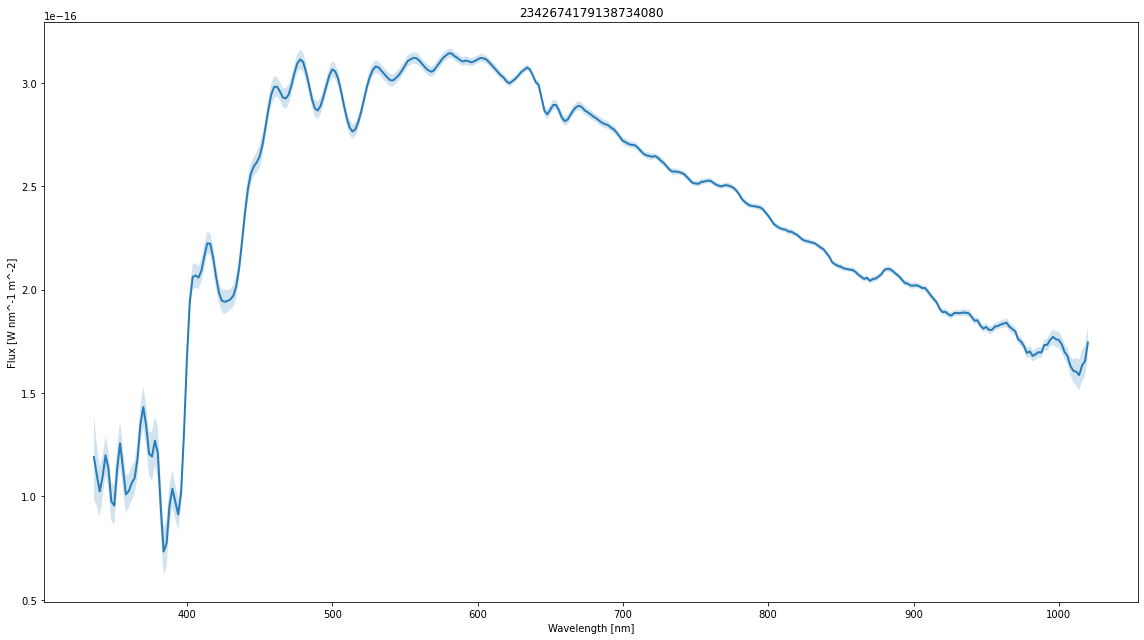

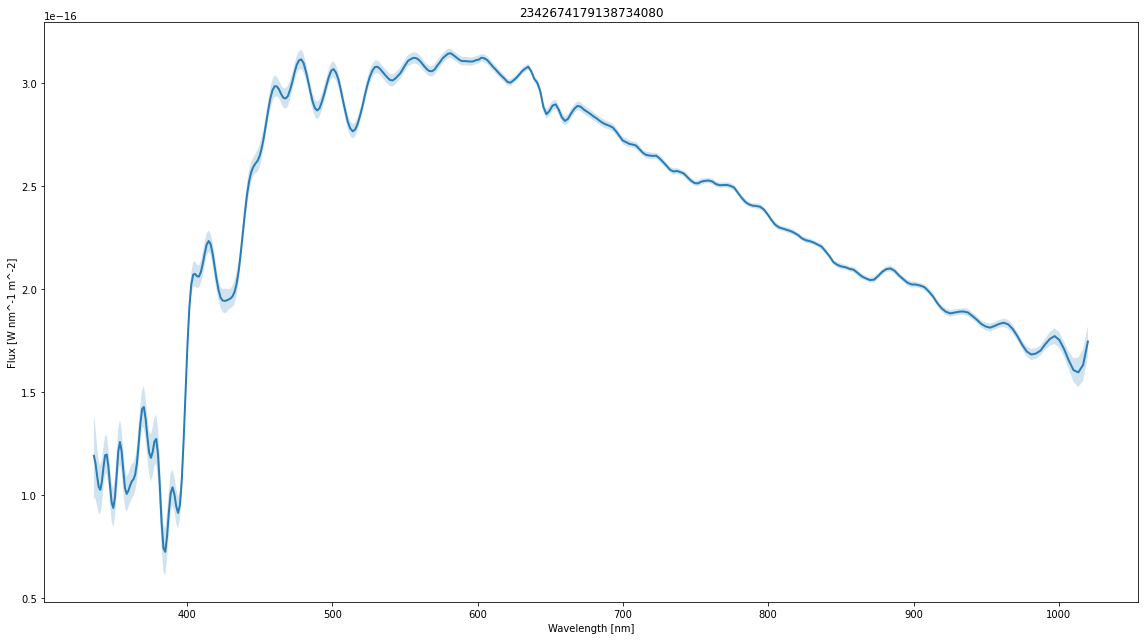

In [14]:
plot_spectra(spectra_default, sampling=sampling)
plot_spectra(spectra_geom, sampling=geom_sampling)

### Generate synthetic photometry <a name="synthphot"></a>


GaiaXPy can generate synthetic photometry for either predefined filter or user defined ones. We will use here predefined ones.

In [15]:
from gaiaxpy import generate, PhotometricSystem
PhotometricSystem.get_available_systems()

'DECam, Els_Custom_W09_S2, Euclid_VIS, Gaia_2, Gaia_DR3_Vega, Halpha_Custom_AB, H_Custom, Hipparcos_Tycho, HST_ACSWFC, HST_HUGS_Std, HST_WFC3UVIS, HST_WFPC2, IPHAS, JKC, JKC_Std, JPAS, JPLUS, JWST_NIRCAM, LSST, PanSTARRS1, PanSTARRS1_Std, Pristine, SDSS, SDSS_Std, Sky_Mapper, Stromgren, Stromgren_Std, WFIRST'

In [16]:
query_input = "select TOP 5 source_id from gaiadr3.gaia_source where has_xp_continuous = 'True'"
phot_system_list = [PhotometricSystem.Stromgren, PhotometricSystem.SDSS]
synthetic_photometry = generate(query_input, photometric_system=phot_system_list, error_correction=True)
synthetic_photometry

INFO: Query finished. [astroquery.utils.tap.core]


                                                           0/2 [00:00<?, ?syst/s]/s]

source_id  Stromgren_mag_u  Stromgren_mag_v  Stromgren_mag_b  \
0  5937144193346721408        17.288009        18.301150        17.975435   
1  5937144193346721920              NaN        20.438242        18.996737   
2  5937144197664637184        18.503603        20.318796        19.036494   
3  5937144197664673408        18.238153        18.956170        18.020991   
4  5937173266047606784        19.540458        20.135620        18.595040   

   Stromgren_mag_y  Stromgren_flux_u  Stromgren_flux_v  Stromgren_flux_b  \
0        17.240680      3.899027e-18      3.527443e-18      3.707028e-18   
1        18.131302     -1.271968e-19      4.927460e-19      1.447122e-18   
2        18.182655      1.272679e-18      5.500492e-19      1.395091e-18   
3        17.559431      1.625171e-18      1.929531e-18      3.554706e-18   
4        17.532527      4.897526e-19      6.511362e-19      2.095000e-18   

   Stromgren_flux_y  Stromgren_flux_error_u  ...   Sdss_flux_u   Sdss_flux_g  \
0      4.591217e-18            6.950651e-19  ...  1.517465e-30  2.685247e-30   
1      2.021525e-18            6.167675e-19  ... -7.723855e-32  9.658365e-31   
2      1.928137e-18            6.719924e-19  ...  2.664984e-31  8.705165e-31   
3      3.423163e-18            8.008302e-19  ...  6.494314e-31  2.216179e-30   
4      3.509046e-18            6.015676e-19  ...  2.047025e-31  1.435659e-30   

    Sdss_flux_r   Sdss_flux_i   Sdss_flux_z  Sdss_flux_error_u  \
0  6.924480e-30  1.112298e-29  1.533698e-29       1.868269e-31   
1  3.169603e-30  5.208581e-30  7.549418e-30       1.596533e-31   
2  3.067695e-30  4.999721e-30  7.216859e-30       1.729435e-31   
3  5.472295e-30  1.228912e-29  1.791033e-29       2.159065e-31   
4  6.347856e-30  1.352720e-29  2.289377e-29       1.591618e-31   

   Sdss_flux_error_g  Sdss_flux_error_r  Sdss_flux_error_i  Sdss_flux_error_z  
0       3.162775e-32       4.093318e-32       4.420203e-32       1.631894e-31  
1       2.154075e-32       2.735645e-32       3.114467e-32       8.025530e-32  
2       2.138101e-32       2.883074e-32       3.088943e-32       8.525114e-32  
3       8.061063e-32       1.380896e-31       1.763980e-31       7.668099e-31  
4       2.776185e-32       3.955779e-32       5.555864e-32       1.503414e-31  

[5 rows x 28 columns]